In [1]:
#plots will be shown inline 
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats
import pandas as pd
import math
from scipy import interpolate

from SimContatore import SimContatore

## Istruzioni sull'uso del simulatore di un contatore geiger

In [2]:
# Crea l'oggetto "simulatore della molla"
myContatore = SimContatore()

# MisuraConteggi(tempo T di presa dati in secondi, numero N di misure ripetute, posizione geiger)
# posizione geiger e' una stringa e può assumere solo uno di questi valori:
#"O" (orizzontale senza sorgente radioattiva)
#"V" (verticale senza sorgente radioattiva)
#"S" (orizzontale appoggiato sulla sorgente radioattiva)
# l'output sono due numpy array
# es. misuro conteggi in 2 secondi, 20 misure ripetute, nella posizione orizzontale senza sorgente 
mycounts, mytimes = myContatore.MisuraConteggi(2,20,"O")

# Il primo array (mycounts, in questo esempio) ha dimensione pari al numero di misure 
# ogni elemento rappresenta il numero di conteggi registrato nel tempo T di presa dati
print ("")
print (mycounts)

# Il secondo array (mytimes, in questo esempio) e' un vettore di vettori. 
# E' costituito da N elementi (come il numero delle misure ripetute).
# Ciascun elemento e' un vettore che contiene i tempo t_i (in ordine temporale)
# in cui il contatore geiger ha rivelato una particella.
#
# Es.1 Misura i-esima fornisce questi tempi [0.5462 0.7129 0.7511 0.9717] 
# In questa misura il contatore ha registrato 4 conteggi (4 segnali)
# Il primo segnale e' stato rivelato a 0.5462 s dall'inizio della misura,
# il secondo segnale è stato rivelato dopo 0.7129 s  dall'inizio, etc.. 
# Quindi tra il primo ed il secondo segnale sono passati 0.7129-0.5462 = 0.1667 secondi.
#
# Es.2 Misura i-esima fornisce questi tempi []
# Non sono stati registrati conteggi in questa misura.
print ("")
#print (mytimes)
for run in mytimes:
    print (run.size,run)

20 misure ripetute di conteggio in un intervallo temporale di 2.0 s =
[0 4 2 0 2 3 1 2 2 2 3 2 0 1 1 2 1 2 1 0]

[0 4 2 0 2 3 1 2 2 2 3 2 0 1 1 2 1 2 1 0]

0 []
4 [0.7864 1.5573 1.6902 1.7306]
2 [0.4587 1.855 ]
0 []
2 [1.33   1.5499]
3 [0.4365 0.4397 1.9107]
1 [1.2511]
2 [0.6455 1.1686]
2 [1.1501 1.3164]
2 [0.2239 1.0943]
3 [0.6169 1.0112 1.7828]
2 [0.0123 0.0655]
0 []
1 [0.9294]
1 [1.7819]
2 [1.1736 1.2756]
1 [0.1929]
2 [0.0032 1.2307]
1 [1.2009]
0 []


/Users/filippodaminato/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


# Previsione di una distribuzione statistica

50 misure ripetute di conteggio in un intervallo temporale di 2.0 s =
[2 1 4 2 1 1 2 3 1 1 3 1 3 0 2 5 4 4 1 4 4 1 2 4 1 0 2 4 0 1 2 2 1 2 4 1 0
 2 2 3 2 3 1 2 1 0 2 0 1 4]


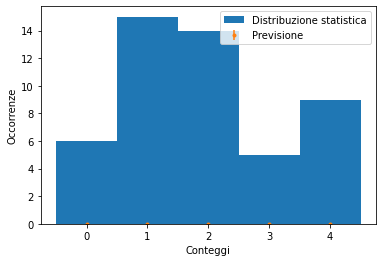

In [6]:
def PrevisionePossion(Lambda,xmin,xmax,n):
    x = np.arange(xmin,xmax)
    k_list = [] 
    sigma_k_list = []
    for i in x:
        p_i = stats.poisson.pmf(i, Lambda)
        k_list.append( n*p_i )
        sigma_k_list.append( math.sqrt( n * p_i * (1-p_i) ) )  
    k = np.asarray(k_list)
    sigma_k = np.asarray(sigma_k_list)
    return k, sigma_k

### NOTA: QUESTO ESEMPIO SERVE SOLO PER ILLUSTRARE LE FUNZIONI DI PYTHON
### PER DISEGNARE ISTOGRAMMA E PREVISIONE NELLO STESSO GRAFICO.
### IL VALORI DEI PARAMETRI (QUI SOTTO) IN QUESTO ESEMPIO SONO CASUALI.
### STA A VOI MODIFICARE IL CODICE PER ADATTARLO AL VOSTRO CASO
N_misure = 50
mycounts1, mytimes1 = myContatore.MisuraConteggi(2,N_misure,"O")
mylambda = len(mycounts1)  #dovrebbe essere il valore atteso di lambda (5 solo un numero a caso)
xmin = min(mycounts1)
xmax = max(mycounts1)
Nbins= xmax-xmin 

# Disegna la distribuzione statistica = istogramma 
# (notare lo shift di -0.5 per far si che il centro del bin sia un numero intero)
plt.hist(mycounts1,bins=Nbins,range=(xmin-0.5,xmax-0.5),label="Distribuzione statistica")

# Calcola e disegna la previsione della distribuzione statistica
x_prev = np.arange(xmin,xmax)
k_prev, sigma_k_prev = PrevisionePossion(mylambda,xmin,xmax,N_misure)
plt.errorbar(x_prev,
             k_prev,
             yerr=sigma_k_prev,
             marker='o',markersize=3,linestyle='none',label="Previsione")

# assi e legenda
plt.xlabel("Conteggi")
plt.ylabel("Occorrenze")
plt.legend()

# Funzioni utili per mostrare un risultato

In [5]:
# Se volete usarle, mettete queste funzioni all'inizio del notebook
# in modo che siano definite se usate in seguito nel codice

def PrintResult(name,mean,sigma,digits,unit):
    mean = round(mean,digits)
    sigma = round(sigma,digits)
    nu = sigma / mean
    result = (name+" = ({0} +/- {1} ) ".format(mean,sigma)+unit+" [{0:.2f}%]".format(nu*100))
    print (result)
    #return ""

def PrintResultAsym(name,mean,sigma_L,sigma_R,digits,unit):
    mean = round(mean,digits)
    sigma_L = round(sigma_L,digits)
    sigma_R = round(sigma_R,digits)
    nu = (sigma_L+sigma_R) / (2*mean)
    result = (name+" = ({0} +/- {1}/{2} ) ".format(mean,sigma_L,sigma_R)+unit+" [{0:.2f}%]".format(nu*100))
    print (result)
    #return ""    
    
# Esempio con incertezze simmetriche a destra e sinistra
PrintResult("massa",10.123,0.146,2,"kg")

# Esempio con incertezze asimmetriche a destra e sinistra
PrintResultAsym("massa",10.123,0.146,0.134,2,"kg")

massa = (10.12 +/- 0.15 ) kg [1.48%]
massa = (10.12 +/- 0.15/0.13 ) kg [1.38%]


# Metodo della massima verosimiglianza

r_best_LL = (0.5 +/- 0.048/0.052 ) conteggi/s [10.00%]


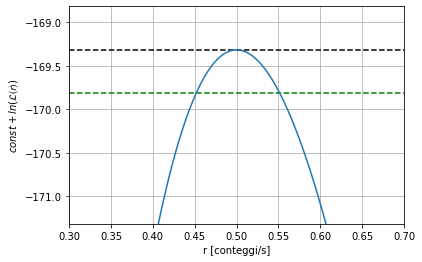

In [6]:
# Log Likelihood - Poisson 
def lnLL(r,sum_xi,T,N):
    return -N*r*T + sum_xi * math.log(r)
lnLL_vfunc = np.vectorize(lnLL)    

deltaT = 4 # intervallo temporale di una singola misura [s]
N_misure = 50 # numero di misure
ntot = 100 # numero totale di conteggi in N_misure

rmin = 0.3
rmax = 0.7
rstep = 0.001

r_values = np.arange(rmin,rmax,rstep)
lnLL_values = lnLL_vfunc(r_values,ntot,deltaT,N_misure)
max_lnLL = np.amax(lnLL_values)

plt.plot(r_values,lnLL_values)
plt.xlabel("r [conteggi/s]")
plt.ylabel(r"$const + ln(\mathcal{L(r)})$")
plt.ylim(np.amax(lnLL_values)-2, np.amax(lnLL_values)+0.5 )
plt.xlim(rmin,rmax)
plt.hlines(max_lnLL,rmin,rmax,linestyle="--")
plt.hlines(max_lnLL-0.5,rmin,rmax,linestyle="--",colors="green")
plt.grid()

# Metodo grafico per la stima delle incertezze su r_best
r_best_LL = r_values[np.argmax(lnLL_values)]

yToFind = max_lnLL-0.5
lnLL_values_reduced = lnLL_values - yToFind
f_reduced = interpolate.UnivariateSpline(r_values, lnLL_values_reduced, s=0)
solutions = f_reduced.roots()
sigma_r_best_left = r_best_LL-solutions[0]
sigma_r_best_right = solutions[1]-r_best_LL

PrintResultAsym("r_best_LL",r_best_LL,sigma_r_best_left,sigma_r_best_right,3,"conteggi/s")

# Disegnare un funzione insieme ad un grafico

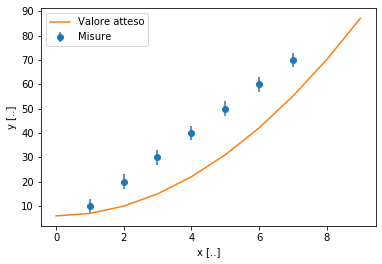

In [7]:
x = np.array([1,2,3,4,5,6,7])
y = np.array([10,20,30,40,50,60,70])
s_y = np.array([3,3,3,3,3,3,3])

xmin = 0
xmax = 10
x_attesa = np.arange(xmin,xmax)
y_attesa = np.exp(0.01*x_attesa) + x_attesa**2 + 5 

plt.errorbar(x,y,yerr=s_y,linestyle="None",marker="o",label="Misure")

plt.plot(x_attesa,y_attesa,label="Valore atteso")

plt.xlabel("x [..]")
plt.ylabel("y [..]")

#plt.yscale("log")

plt.legend()

In [8]:
import scipy.integrate as integrate

def myfunction(x,a):
    value = a*x
    return value

#integral of y=a*x between 0 and 1
myintegral = integrate.quad(myfunction, 0., 1, args=(4))
print (myintegral)

(2.0, 2.220446049250313e-14)
